In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import cv2 as cv
from PIL import Image


In [2]:
import glob
import random
import os
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from  keras.layers import  Dense, Conv2D, MaxPooling2D, Flatten,Dropout
from  tensorflow.keras import Input

In [3]:
cats = pd.read_csv('kaggle_dataset/data/cats.csv')

In [4]:
breed_list = [x[0] for x in os.walk('kaggle_dataset/images/')]
breed_list.remove('kaggle_dataset/images/')

In [5]:
len('kaggle_dataset/images/')

22

In [6]:
for i in range(len(breed_list)):
    breed_list[i]=breed_list[i][22:]
breed_list
    

['Chausie',
 'Ocicat',
 'Himalayan',
 'Burmese',
 'Tortoiseshell',
 'Selkirk Rex',
 'Chinchilla',
 'Birman',
 'American Shorthair',
 'Egyptian Mau',
 'Siberian',
 'LaPerm',
 'Balinese',
 'Dilute Calico',
 'Sphynx - Hairless Cat',
 'Turkish Van',
 'American Bobtail',
 'Manx',
 'Extra-Toes Cat - Hemingway Polydactyl',
 'Cornish Rex',
 'Devon Rex',
 'Korat',
 'Ragdoll',
 'Abyssinian',
 'Silver',
 'Tiger',
 'Siamese',
 'Maine Coon',
 'York Chocolate',
 'Bengal',
 'Torbie',
 'Scottish Fold',
 'Turkish Angora',
 'Snowshoe',
 'Javanese',
 'Tuxedo',
 'Nebelung',
 'British Shorthair',
 'Canadian Hairless',
 'Oriental Short Hair',
 'Tonkinese',
 'Ragamuffin',
 'Bombay',
 'Havana',
 'Singapura',
 'Dilute Tortoiseshell',
 'Domestic Medium Hair',
 'Domestic Short Hair',
 'American Curl',
 'Somali',
 'Applehead Siamese',
 'Munchkin',
 'Oriental Tabby',
 'Burmilla',
 'Russian Blue',
 'Calico',
 'Persian',
 'Chartreux',
 'Exotic Shorthair',
 'Domestic Long Hair',
 'American Wirehair',
 'Cymric',
 'Pix

In [7]:
breed_dic={}
for breed in breed_list:
    #print(breed)
    breed_dic[breed] = glob.glob(f"kaggle_dataset/images/{breed}/*.jpg")

In [8]:
df =pd.DataFrame()

for breed in breed_list:
    df = pd.concat([df,pd.DataFrame(breed_dic[breed])])
    
df.rename(columns={0:'path'},inplace=True)
df=df.sample(20000)

In [9]:
df['breed'] = df['path'].apply(lambda x:x.split('/')[2])


In [10]:
def open_image(pathim):
    try:
        return np.array(Image.open(pathim).resize((100,100)))
    except:
        return ''

In [11]:
df['img']= df['path'].map(lambda x: open_image(x))

In [12]:
df

,path,breed,img
32082,kaggle_dataset/images/Domestic Short Hair/4673...,Domestic Short Hair,"[[[118, 106, 94], [134, 120, 109], [137, 125, ..."
11864,kaggle_dataset/images/Domestic Short Hair/4673...,Domestic Short Hair,"[[[218, 216, 217], [218, 216, 217], [218, 216,..."
1009,kaggle_dataset/images/Tiger/41972970_5289.jpg,Tiger,"[[[208, 207, 212], [210, 209, 214], [210, 209,..."
40677,kaggle_dataset/images/Domestic Short Hair/4663...,Domestic Short Hair,"[[[86, 36, 13], [78, 27, 5], [79, 27, 9], [80,..."
1375,kaggle_dataset/images/Siamese/45959809_3982.jpg,Siamese,"[[[72, 86, 109], [74, 86, 106], [68, 77, 94], ..."
...,...,...,...
43013,kaggle_dataset/images/Domestic Short Hair/4648...,Domestic Short Hair,"[[[213, 237, 241], [213, 235, 239], [213, 232,..."
164,kaggle_dataset/images/Tabby/46559349_17683.jpg,Tabby,"[[[212, 213, 208], [208, 209, 204], [201, 202,..."
3147,kaggle_dataset/images/Dilute Tortoiseshell/448...,Dilute Tortoiseshell,"[[[49, 60, 74], [47, 57, 69], [38, 46, 56], [3..."
21619,kaggle_dataset/images/Domestic Short Hair/4633...,Domestic Short Hair,"[[[254, 253, 250], [252, 254, 251], [254, 253,..."


In [13]:
df.drop(index=28,inplace=True)

In [14]:
df['shape']=df['img'].map(lambda x:x.shape)

In [15]:
df=df[df['shape']==(100,100,3)]

In [16]:
df['shape'].value_counts()

(100, 100, 3)    19989
Name: shape, dtype: int64

In [17]:
X= df.img
y=df['breed']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,train_size=0.7)
np.shape(X_train)

(13992,)

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=4,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True)

In [34]:
labels =list(set(y_train))
labels

['Tiger',
 'Turkish Angora',
 'Burmese',
 'Oriental Long Hair',
 'Japanese Bobtail',
 'Applehead Siamese',
 'American Shorthair',
 'Domestic Long Hair',
 'American Curl',
 'Abyssinian',
 'Siberian',
 'Domestic Short Hair',
 'Chartreux',
 'Torbie',
 'Manx',
 'Pixiebob',
 'LaPerm',
 'Ragamuffin',
 'Dilute Tortoiseshell',
 'Russian Blue',
 'Korat',
 'Oriental Short Hair',
 'Tuxedo',
 'Ocicat',
 'Cymric',
 'Domestic Medium Hair',
 'Silver',
 'American Bobtail',
 'Cornish Rex',
 'Bombay',
 'Singapura',
 'Norwegian Forest Cat',
 'Snowshoe',
 'Oriental Tabby',
 'Tonkinese',
 'York Chocolate',
 'Selkirk Rex',
 'Maine Coon',
 'Dilute Calico',
 'Javanese',
 'British Shorthair',
 'Tabby',
 'Calico',
 'Scottish Fold',
 'Birman',
 'Exotic Shorthair',
 'Tortoiseshell',
 'Chausie',
 'Nebelung',
 'Siamese',
 'Balinese',
 'Turkish Van',
 'Himalayan',
 'Munchkin',
 'Havana',
 'Ragdoll',
 'Sphynx - Hairless Cat',
 'Devon Rex',
 'Bengal',
 'Somali',
 'Egyptian Mau',
 'Persian',
 'Extra-Toes Cat - Hemingwa

In [35]:
from tensorflow.keras.utils import to_categorical

X_train = np.array(list(X_train))

uniques, ids = np.unique(y_train, return_inverse=True)
y_code = to_categorical(ids, len(uniques))
#y_train = to_categorical(np.asarray(y_train.factorize()[0]))



In [36]:
nb_race = df.breed.nunique()
nb_race

64

In [39]:
def model_20():
    
    # $CHALLENGIFY_BEGIN
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same', input_shape=(100,100,3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (2, 2), activation = 'relu', padding = 'same'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(63, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])
    
    # $CHALLENGIFY_END    
    
    return model

In [40]:
model = model_20()
model.fit(np.array(X_train)/255, y_code,epochs=50,callbacks=[es],verbose=1,batch_size=32, validation_split=0.2)

Epoch 1/50


2022-11-21 18:31:34.427195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


350/350 [==============================] - ETA: 0s - loss: 2.7932 - accuracy: 0.4149

2022-11-21 18:31:48.698607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


350/350 [==============================] - 16s 43ms/step - loss: 2.7932 - accuracy: 0.4149 - val_loss: 2.9426 - val_accuracy: 0.4119
Epoch 2/50
350/350 [==============================] - 14s 41ms/step - loss: 2.6611 - accuracy: 0.4171 - val_loss: 2.8488 - val_accuracy: 0.4119
Epoch 3/50
350/350 [==============================] - 14s 40ms/step - loss: 2.6169 - accuracy: 0.4172 - val_loss: 2.8783 - val_accuracy: 0.4119
Epoch 4/50
350/350 [==============================] - 14s 39ms/step - loss: 2.5787 - accuracy: 0.4165 - val_loss: 2.7705 - val_accuracy: 0.4119
Epoch 5/50
350/350 [==============================] - 14s 40ms/step - loss: 2.5333 - accuracy: 0.4168 - val_loss: 2.7592 - val_accuracy: 0.4123
Epoch 6/50
350/350 [==============================] - 13s 38ms/step - loss: 2.4745 - accuracy: 0.4178 - val_loss: 2.7073 - val_accuracy: 0.4137
Epoch 7/50
350/350 [==============================] - 14s 39ms/step - loss: 2.4206 - accuracy: 0.4201 - val_loss: 2.7772 - val_accuracy: 0.4119
Epo

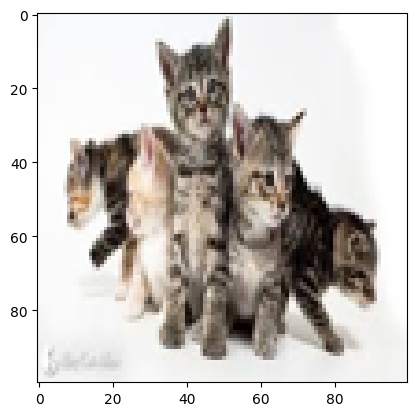

In [25]:
test = (open_image('catim.jpg')/255)
plt.imshow(test)

In [31]:
np.argmax(model.predict(np.expand_dims(test,0)))

1/1 [==============================] - 0s 32ms/step


3

In [43]:
uniques[np.argmax(model.predict(np.expand_dims(test,0)))]

1/1 [==============================] - 0s 51ms/step


'Domestic Short Hair'

In [46]:
df_un=pd.DataFrame(list(uniques))
df_un

,0
0,Abyssinian
1,American Bobtail
2,American Curl
3,American Shorthair
4,Applehead Siamese
...,...
58,Tortoiseshell
59,Turkish Angora
60,Turkish Van
61,Tuxedo


In [47]:
df_un.to_csv('breed.csv')

In [48]:
model.save_weights('model/')

In [51]:
list(df_un[0])

['Abyssinian',
 'American Bobtail',
 'American Curl',
 'American Shorthair',
 'Applehead Siamese',
 'Balinese',
 'Bengal',
 'Birman',
 'Bombay',
 'British Shorthair',
 'Burmese',
 'Calico',
 'Chartreux',
 'Chausie',
 'Cornish Rex',
 'Cymric',
 'Devon Rex',
 'Dilute Calico',
 'Dilute Tortoiseshell',
 'Domestic Long Hair',
 'Domestic Medium Hair',
 'Domestic Short Hair',
 'Egyptian Mau',
 'Exotic Shorthair',
 'Extra-Toes Cat - Hemingway Polydactyl',
 'Havana',
 'Himalayan',
 'Japanese Bobtail',
 'Javanese',
 'Korat',
 'LaPerm',
 'Maine Coon',
 'Manx',
 'Munchkin',
 'Nebelung',
 'Norwegian Forest Cat',
 'Ocicat',
 'Oriental Long Hair',
 'Oriental Short Hair',
 'Oriental Tabby',
 'Persian',
 'Pixiebob',
 'Ragamuffin',
 'Ragdoll',
 'Russian Blue',
 'Scottish Fold',
 'Selkirk Rex',
 'Siamese',
 'Siberian',
 'Silver',
 'Singapura',
 'Snowshoe',
 'Somali',
 'Sphynx - Hairless Cat',
 'Tabby',
 'Tiger',
 'Tonkinese',
 'Torbie',
 'Tortoiseshell',
 'Turkish Angora',
 'Turkish Van',
 'Tuxedo',
 'Yo

In [55]:
pd.read_csv('breed.csv')['0']

0             Abyssinian
1       American Bobtail
2          American Curl
3     American Shorthair
4      Applehead Siamese
             ...        
58         Tortoiseshell
59        Turkish Angora
60           Turkish Van
61                Tuxedo
62        York Chocolate
Name: 0, Length: 63, dtype: object

In [30]:
import requests
from PIL import Image
import numpy as np
from catface.ml.model_creation import open_image,model_20
from catface.utils.rescale import rescaleframe,scale_model


In [17]:
img =open_image('data/images/cat.jpg')

In [22]:
model=model_20()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-03-06 15:34:35.389596: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-06 15:34:35.390392: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [28]:
model.load_weights('model/')

In [56]:
import json

In [72]:
requests.post('http://0.0.0.0:8000/predict?',data=img)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [51]:
model.predict(np.expand_dims(scale_model(rescaleframe(img)),0))

1/1 [==============================] - 0s 93ms/step


array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 6.350592e-30,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.00